In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os


#train_test = r'C:\Users\Pantelis\Documents\uni\tede\Second\fulltext\data'
#df_ml = pd.read_csv(march_listings, low_memory=False )

dir_name = 'fulltext\data/'

folder_entries = os.listdir(dir_name)
os.listdir(dir_name)

train_test = pd.DataFrame(columns=['id', 'title', 'content', 'category'])

count = 0
for filename in os.listdir(dir_name):
    if filename == 'README.TXT':
        continue
    else:
        nested_dir = dir_name + filename
        for txt_file in os.listdir(nested_dir):
            count += 1
            open_file = nested_dir + '/' + txt_file
            with open(open_file) as f:
                first_line = f.readline()
                content = ''
                for line in f:
                    content = content + line
            
            train_test = train_test.append({'id': count, 'title': first_line, 'content': content, 'category': filename }, ignore_index=True)

            
train_set, test_set = train_test_split(train_test , test_size=0.2, stratify=train_test['category'])

train_set.to_csv('train_set.tsv', sep = '\t')
Test_Y = test_set['category'] 
del test_set['category']
test_set.to_csv('test_set.tsv', sep = '\t')


politics:


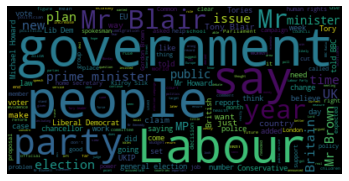

entertainment:


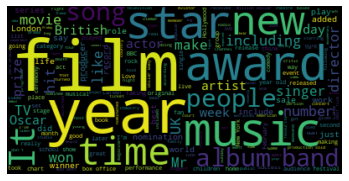

sport:


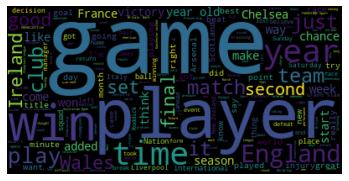

business:


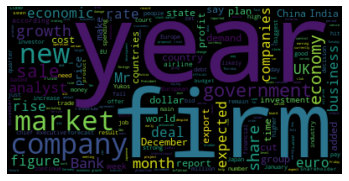

tech:


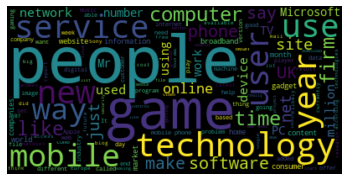

In [3]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

train_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\train_set.tsv'
train_df = pd.read_csv(train_path, sep='\t')

our_words = 'said will'.split()
our_stopwords = ENGLISH_STOP_WORDS.union(our_words)

categories = train_df.category.unique()
for category in categories:
    print(category+':')
    text = ' '.join(train_df[train_df.category == category].content.values)
    wordcloud = WordCloud(stopwords=our_stopwords).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score


Encoder = LabelEncoder() 
Train_Y = Encoder.fit_transform(train_df["category"])
Test_Y = Encoder.fit_transform(Test_Y)


test_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\test_set.tsv'
test_df = pd.read_csv(test_path, sep='\t')

#train_df
tfidf = TfidfVectorizer()
tfs_train = tfidf.fit_transform(train_df['content'])
tfs_test = tfidf.transform(test_df['content'])

count_vectorizer = CountVectorizer()
counts_train = count_vectorizer.fit_transform(train_df['content'])
counts_test = count_vectorizer.transform(test_df['content'])



In [13]:

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.1, kernel='linear',gamma=0.001,probability=True)
SVM.fit(tfs_train,Train_Y)

"""
cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'accuracy'))
print ("Accuracy using SVM with 10 cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Accuracy using SVM with 10 cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Accuracy using SVM with 10 cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Accuracy using SVM with 10 cross validation and f1: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, tfs_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Accuracy using SVM with 10 cross validation and roc: {}%".format(round(cv*100,2)))
"""

# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_SVM, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_SVM, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_SVM, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_SVM)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)



0.9003443276549474 0.8719101123595505 0.870040719122818 0.8719101123595505


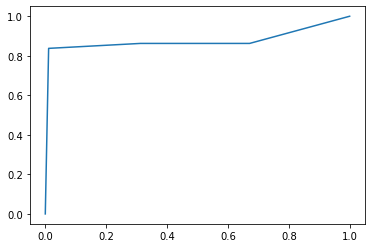

AUC: 0.876472602739726
  (0, 898)	1
  (0, 1354)	1
  (0, 1407)	1
  (0, 1566)	1
  (0, 1569)	1
  (0, 1690)	1
  (0, 1788)	3
  (0, 1791)	1
  (0, 1797)	1
  (0, 1809)	1
  (0, 1926)	1
  (0, 2027)	1
  (0, 2062)	3
  (0, 2187)	4
  (0, 2219)	11
  (0, 2323)	1
  (0, 2396)	1
  (0, 2454)	1
  (0, 2506)	4
  (0, 2522)	1
  (0, 2606)	1
  (0, 2624)	6
  (0, 2712)	6
  (0, 2742)	4
  (0, 2990)	1
  :	:
  (444, 24387)	1
  (444, 24388)	1
  (444, 24398)	1
  (444, 24436)	1
  (444, 24448)	1
  (444, 24472)	1
  (444, 24603)	8
  (444, 24944)	1
  (444, 25152)	1
  (444, 25299)	1
  (444, 25604)	2
  (444, 25634)	1
  (444, 25682)	1
  (444, 25916)	1
  (444, 26037)	1
  (444, 26240)	1
  (444, 26308)	1
  (444, 26399)	1
  (444, 26446)	1
  (444, 26500)	1
  (444, 26623)	1
  (444, 26634)	2
  (444, 26752)	1
  (444, 26823)	1
  (444, 26980)	2
27060


TypeError: matrix is not square

In [45]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances
from operator import itemgetter
import operator



fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_SVM, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


print(counts_test)


test_Set=counts_test
training_Set=counts_train

#FOR THE WHOLE TEST SET#
for x in range(test_Set.shape[0]):

#CREATE NEIGHBORS#
	distances = []
	length = test_Set.shape[1]
	print( length)
	for i in range(training_Set.shape[0]):
        
        #EUCLIDEAN DISTANCE#
		dist = 0
		for j in range(length):
			dist += pow((test_Set[x][j] - training_Set[i][j]), 2)
		dist = math.sqrt(dist)
        #EUCLIDEAN DISTANCE#
        
		distances.append((training_Set[i], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for i in range(k):
		neighbors.append(distances[i][0])
#CREATE NEIGHBORS#

	print( neighbors)

#CLASSIFY#
	Votes = {}
    
	for i in range(len(neighbors)):
		r = neighbors[i][0]
		if r in Votes:
			Votes[r] += 1
		else:
			Votes[r] = 1
#CLASSIFY#  

	sorted_Votes = sorted(Votes.iteritems(), key=operator.itemgetter(1), reverse=True)
	print(sorted_Votes)


In [22]:

# Example of calculating Euclidean distance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
row0 = dataset[0]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

    
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
    
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
	print(neighbor)
    

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795
[2.7810836, 2.550537003, 0]
[3.06407232, 3.005305973, 0]
[1.465489372, 2.362125076, 0]


In [14]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=0.1, kernel='linear',gamma=0.001)
SVM.fit(counts_train,Train_Y)

"""
cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10))
print ("Accuracy using SVM with 10 cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Accuracy using SVM with 10 cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Accuracy using SVM with 10 cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Accuracy using SVM with 10 cross validation and f1: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(SVM, counts_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Accuracy using SVM with 10 cross validation and roc: {}%".format(round(cv*100,2)))
"""

# predict the labels on validation dataset
predictions_SVM = SVM.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_SVM, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_SVM, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_SVM, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_SVM)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

0.9667426229342702 0.9662921348314607 0.9661797014850845 0.9662921348314607


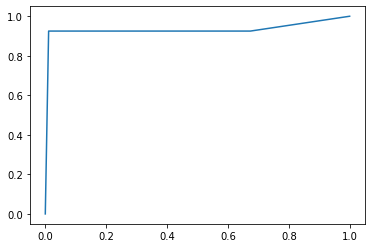

AUC: 0.9321575342465753


In [75]:

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_SVM, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [5]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(tfs_train,Train_Y)

"""
cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10))
print ("Accuracy using RF with 10 cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Accuracy using RF with 10 cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Accuracy using RF with 10 cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, tfs_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Accuracy using RF with 10 cross validation and f1: {}%".format(round(cv*100,2)))
"""

predictions_RF = RF.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_RF)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)


0.9448808868599579 0.9438202247191011 0.9431440706563449 0.9438202247191011


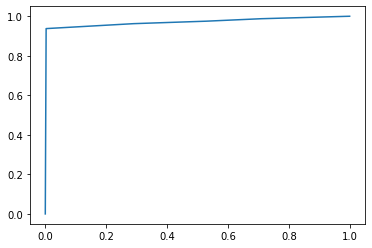

AUC: 0.9715068493150685


In [6]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

#TFIDF

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [9]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(counts_train,Train_Y)

"""
cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10))
print ("Accuracy using RF with 10 cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Accuracy using RF with 10 cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Accuracy using RF with 10 cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(RF, counts_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Accuracy using RF with 10 cross validation and f1: {}%".format(round(cv*100,2)))
"""

predictions_RF = RF.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_RF)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

0.9524663957311577 0.950561797752809 0.9501928354631047 0.950561797752809


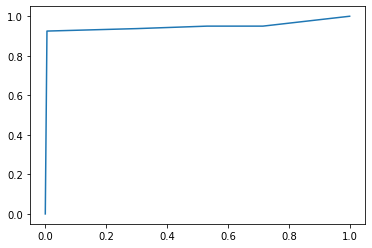

AUC: 0.9474657534246576


In [10]:
#COUNTS

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

0.9602385241384784 0.9595505617977528 0.9591926887820387 0.9595505617977528


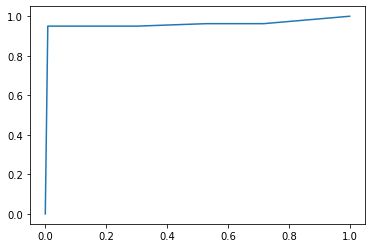

AUC: 0.9586986301369863


In [23]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

Encoder = LabelEncoder() 
Train_Y = Encoder.fit_transform(train_df["category"])
Test_Y = Encoder.fit_transform(Test_Y)


test_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\test_set.tsv'
test_df = pd.read_csv(test_path, sep='\t')


our_words = {'said', 'say', 'will','just', 'yes', 'don', 'didn'}
our_stopwords = ENGLISH_STOP_WORDS.union(our_words)

#for idx, row in train_df.iterrows():
#    train_df.loc[idx,'content'] = row.title*5 + row.content

#train_df
tfidf = TfidfVectorizer(stop_words = our_stopwords)
tfs_train = tfidf.fit_transform(train_df['content'])
tfs_test = tfidf.transform(test_df['content'])

count_vectorizer = CountVectorizer(stop_words = our_stopwords)
counts_train = count_vectorizer.fit_transform(train_df['content'])
counts_test = count_vectorizer.transform(test_df['content'])


RF = RandomForestClassifier(n_estimators=100)
RF.fit(tfs_train,Train_Y)

predictions_RF = RF.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_RF)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


0.9568976165263746 0.9550561797752809 0.9547897921985787 0.9550561797752809


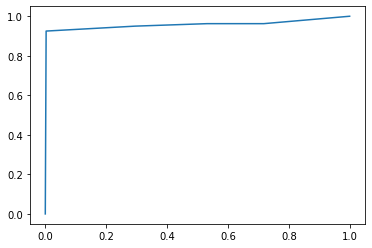

AUC: 0.9576198630136986


In [24]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(counts_train,Train_Y)

predictions_RF = RF.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_RF, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_RF, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_RF, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_RF)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_RF, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [9]:
from sklearn import naive_bayes

Bayes = naive_bayes.MultinomialNB()
Bayes.fit(tfs_train,Train_Y)

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10))
print ("Accuracy using Naive Bayes with 10 cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, tfs_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and f1: {}%".format(round(cv*100,2)))

predictions_Bayes = Bayes.predict(tfs_test)

prec_score_test = precision_score(Test_Y, predictions_Bayes, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_Bayes, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_Bayes, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_Bayes)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)

Accuracy using Naive Bayes with 10 cross validation : 94.21%
Accuracy using Naive Bayes with 10 cross validation and precision : 94.52%
Accuracy using Naive Bayes with 10 cross validation and recall : 94.21%
Accuracy using Naive Bayes with 10 cross validation and f1: 94.12%
0.9527514317161345 0.950561797752809 0.9495974542728057 0.950561797752809


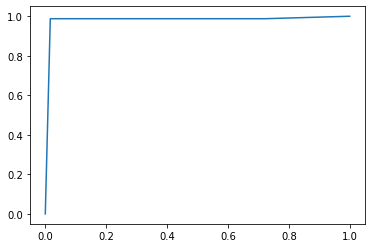

AUC: 0.9811301369863015


In [86]:
fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_Bayes, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [197]:


Bayes = naive_bayes.MultinomialNB()
Bayes.fit(counts_train,Train_Y)

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10))
print ("Accuracy using Naive Bayes with 10 cross validation : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'precision_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and precision : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'recall_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and recall : {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'f1_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and f1: {}%".format(round(cv*100,2)))

cv = np.mean(cross_val_score(Bayes, counts_train, Train_Y, cv=10, scoring = 'roc_auc_ovr_weighted'))
print ("Accuracy using Naive Bayes with 10 cross validation and roc: {}%".format(round(cv*100,2)))


predictions_Bayes = Bayes.predict(counts_test)

prec_score_test = precision_score(Test_Y, predictions_Bayes, average = 'weighted')
rec_score_test = recall_score(Test_Y, predictions_Bayes, average = 'weighted')
f1_score_test = f1_score(Test_Y, predictions_Bayes, average = 'weighted')
acc_score_test = accuracy_score(Test_Y, predictions_Bayes)


print(prec_score_test, rec_score_test, f1_score_test, acc_score_test)
counts_test.shape

Accuracy using Naive Bayes with 10 cross validation : 98.76%
Accuracy using Naive Bayes with 10 cross validation and precision : 98.82%
Accuracy using Naive Bayes with 10 cross validation and recall : 98.76%
Accuracy using Naive Bayes with 10 cross validation and f1: 98.76%
Accuracy using Naive Bayes with 10 cross validation and roc: 99.83%
0.6540705227478563 0.7842696629213484 0.7086971368824773 0.7842696629213484


C:\Users\Pantelis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(445, 26501)

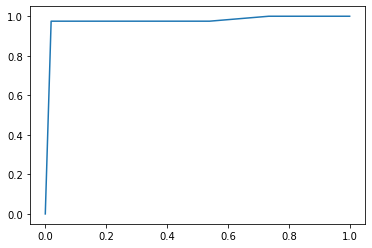

AUC: 0.9747260273972603


In [94]:
fpr, tpr, thresholds = metrics.roc_curve(Test_Y, predictions_Bayes, pos_label=4)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [195]:
from sklearn import preprocessing  # to normalise existing X
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec 

test_df['tokenized_sents'] = test_df['content'].apply(lambda x: x.split())
data = test_df['tokenized_sents']

sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
                        ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]

model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5)




unable to import 'smart_open.gcs', disabling that module


In [112]:
from sklearn import preprocessing  # to normalise existing X
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec 
from nltk.cluster import KMeansClusterer
from nltk.cluster.util import cosine_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


clusters_number = 5
kclusterer = KMeansClusterer(clusters_number,  distance= cosine_distance, repeats=25)#CHANGE IT DOWN TOO

assigned_clusters = kclusterer.cluster(counts_train.toarray(), assign_clusters=True)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [118]:
clusters_number = 5
kclusterer = KMeansClusterer(clusters_number,  distance= cosine_distance, repeats=50)

assigned_clusters = kclusterer.cluster(tfs_train.toarray(), assign_clusters=True)

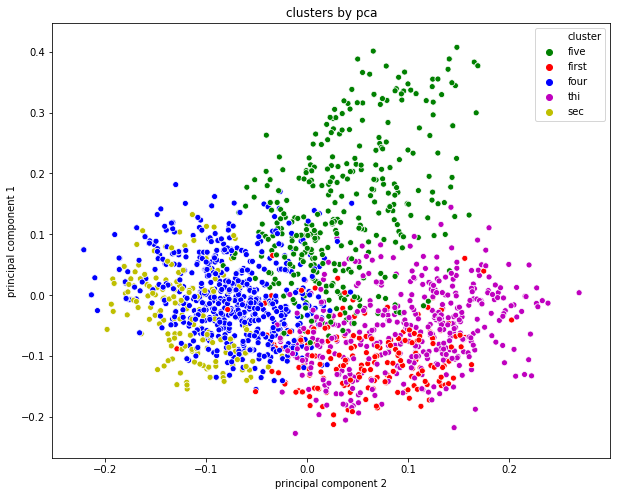

principal component 1  principal component 2  category       cat_plot  \
0                  0.124149               0.025744         2          sport   
1                 -0.135515               0.049390         1  entertainment   
2                  0.036241              -0.035868         2          sport   
3                 -0.158104               0.097259         3       business   
4                 -0.057399              -0.034185         0       politics   
...                     ...                    ...       ...            ...   
1775              -0.065689              -0.115663         0       politics   
1776              -0.134578               0.132416         3       business   
1777               0.150232               0.129341         2          sport   
1778              -0.060670               0.006160         1  entertainment   
1779               0.013297              -0.170826         4           tech   

      targets cluster  
0           4    five  
1           0   first  
2           4    five  
3           0   first  
4           3    four  
...       ...     ...  
1775        1     sec  
1776        0   first  
1777        4    five  
1778        2     thi  
1779        3    four  

[1780 rows x 6 columns]

In [124]:
#scaler = StandardScaler()
#sgm_std = scaler.fit_transform(tfs_train.toarray())
    
    
pca = PCA(n_components=2)
pca = pca.fit_transform(tfs_train.toarray())


principalDf = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = Train_Y
principalDf['cat_plot'] = principalDf['category'].map({0:'politics',1:'entertainment',2:'sport',3:'business',4:'tech'})

principalDf['targets'] = assigned_clusters

principalDf['cluster'] = principalDf['targets'].map({0:'first',1:'sec',2:'thi',3:'four',4:'five'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()

principalDf

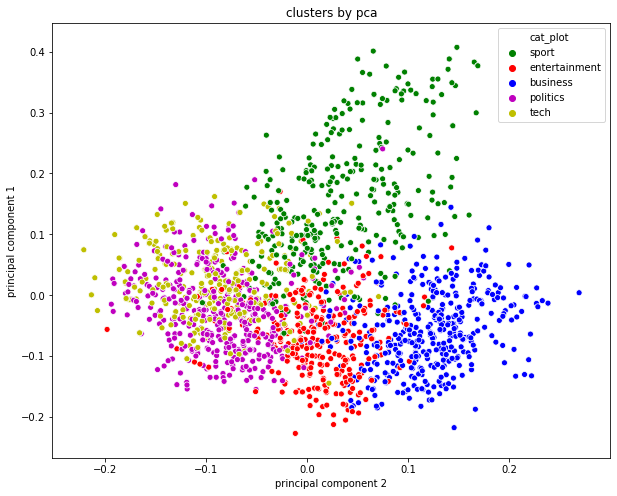

In [125]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cat_plot'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()

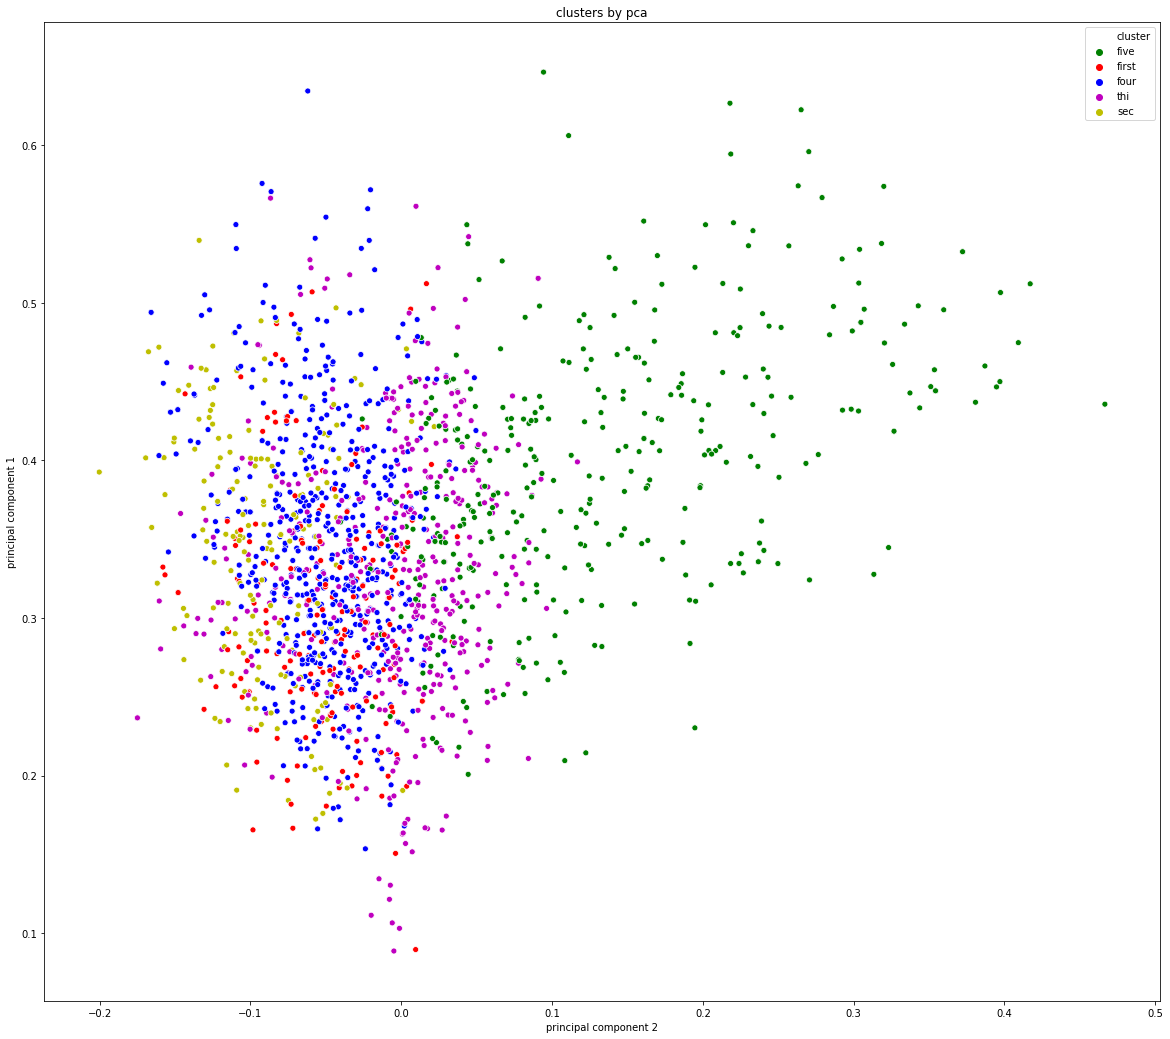

In [128]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=0)
matrix_lsi = svd.fit_transform(tfs_train)



principalDf = pd.DataFrame(data = matrix_lsi, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = Train_Y
principalDf['cat_plot'] = principalDf['category'].map({0:'politics',1:'entertainment',2:'sport',3:'business',4:'tech'})

principalDf['targets'] = assigned_clusters

principalDf['cluster'] = principalDf['targets'].map({0:'first',1:'sec',2:'thi',3:'four',4:'five'})

principalDf['category'] = df['category']

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()


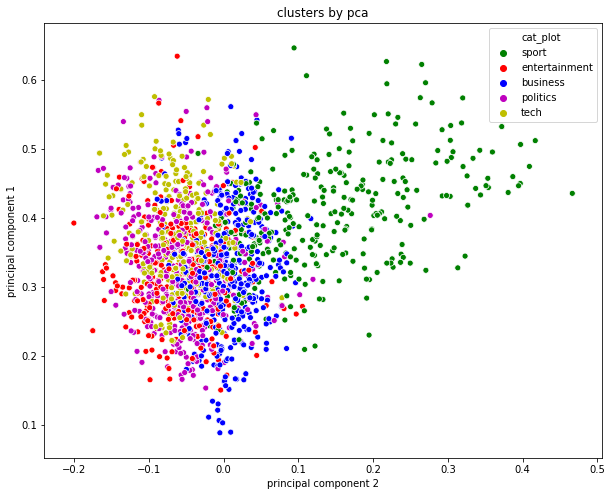

In [129]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cat_plot'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()

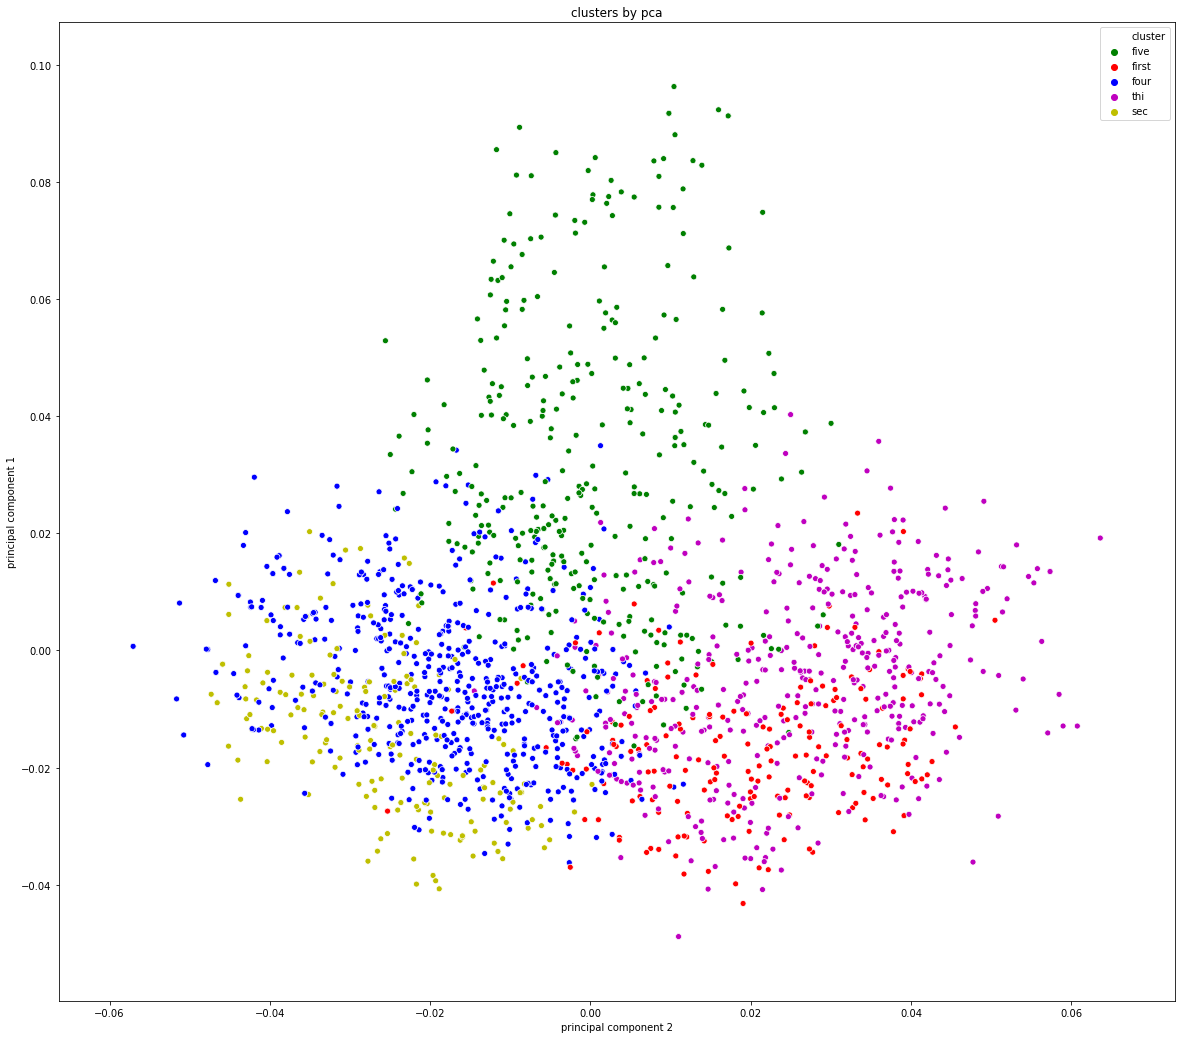

In [130]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=2, random_state=0)
matrix_ica = transformer.fit_transform(tfs_train.toarray())

principalDf = pd.DataFrame(data = matrix_ica, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = Train_Y
principalDf['cat_plot'] = principalDf['category'].map({0:'politics',1:'entertainment',2:'sport',3:'business',4:'tech'})

principalDf['targets'] = assigned_clusters

principalDf['cluster'] = principalDf['targets'].map({0:'first',1:'sec',2:'thi',3:'four',4:'five'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()


In [131]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cat_plot'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()

In [84]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

all_words = []

df = pd.DataFrame(columns=['category', 'word'])

categories = train_df.category.unique()
for category in categories:
    print(category+':')
    article_titles = train_df[train_df.category == category].content
    titles_list = [title for title in article_titles]    
    big_title_string = ' '.join(titles_list)    
    
    
    # Tokenize the string into words
    tokens = word_tokenize(big_title_string)

    # Remove non-alphabetic tokens, such as punctuation
    words = [word.lower() for word in tokens if word.isalpha()]

    # Filter out stopwords
    stop_words = set(stopwords.words('english'))

    words = [word for word in words if not word in stop_words]
    
    for word in words:
        df = df.append({'category': category, 'word': word }, ignore_index=True)
    
    
    #train_test = pd.DataFrame(columns=['category', 'word'])
    





# Grab all the titles 
article_titles = train_df['content']
# Create a list of strings, one for each title
titles_list = [title for title in article_titles]

# Collapse the list of strings into a single long string for processing
big_title_string = ' '.join(titles_list)

#from nltk.tokenize import word_tokenize
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

# Tokenize the string into words
tokens = word_tokenize(big_title_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]


# Filter out stopwords

stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]


#from gensim.models.keyedvectors import KeyedVectors
#model = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt', binary = False ) 

# Check dimension of word vectors
#model.vector_size

df.to_csv('df.csv')

politics:
entertainment:
sport:
business:
tech:


In [85]:
df

category       word
0       politics      betty
1       politics  boothroyd
2       politics       said
3       politics      house
4       politics      lords
...          ...        ...
371332      tech      using
371333      tech        one
371334      tech    network
371335      tech  different
371336      tech        one

[371337 rows x 2 columns]

In [86]:


df_path = r'C:\Users\Pantelis\Documents\uni\tede\Second\df.csv'
df = pd.read_csv(df_path)

final_words = df['word'].tolist()

model = KeyedVectors.load_word2vec_format('glove.6B.300d.word2vec.txt', binary = False ) 

# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in final_words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in final_words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df2 = pd.DataFrame.from_dict(word_vec_dict, orient='index')

"""
word_vectors = model.syn0

word_vectors.shape[0] / 5

word_vectors
"""


'\nword_vectors = model.syn0\n\nword_vectors.shape[0] / 5\n\nword_vectors\n'

In [99]:
print(len(vector_list))
print(len(words_filtered))

df = df[df.word.isin(words_filtered)]

df


369974
369974


Unnamed: 0  category       word
0                0  politics      betty
1                1  politics  boothroyd
2                2  politics       said
3                3  politics      house
4                4  politics      lords
...            ...       ...        ...
371332      371332      tech      using
371333      371333      tech        one
371334      371334      tech    network
371335      371335      tech  different
371336      371336      tech        one

[369974 rows x 3 columns]

In [133]:
from sklearn import preprocessing  # to normalise existing X
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim 
from gensim.models import Word2Vec 
from nltk.cluster import KMeansClusterer
from nltk.cluster.util import cosine_distance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


clusters_number = 5
kclusterer = KMeansClusterer(clusters_number,  distance= cosine_distance, repeats=1)#add more!

assigned_clusters = kclusterer.cluster(vector_list, assign_clusters=True)


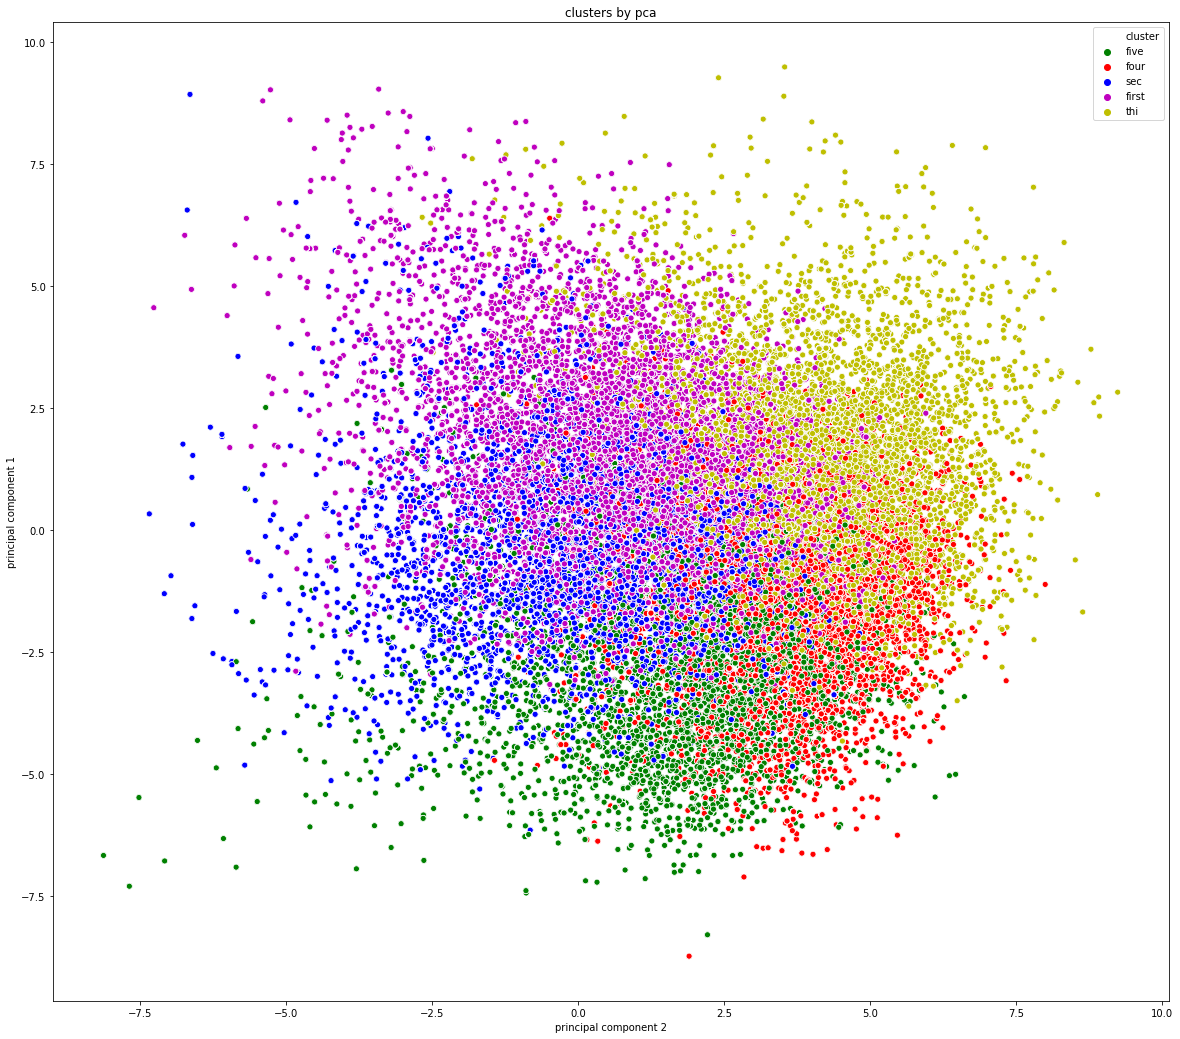

In [134]:
scaler = StandardScaler()
sgm_std = scaler.fit_transform(vector_list)
    
    
pca = PCA(n_components=2)
pca = pca.fit_transform(sgm_std)


principalDf = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = df['category']
#principalDf['cat_plot'] = principalDf['category'].map({:'first',1:'sec',2:'thi',3:'four',4:'five'})

principalDf['targets'] = assigned_clusters

principalDf['cluster'] = principalDf['targets'].map({0:'first',1:'sec',2:'thi',3:'four',4:'five'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()


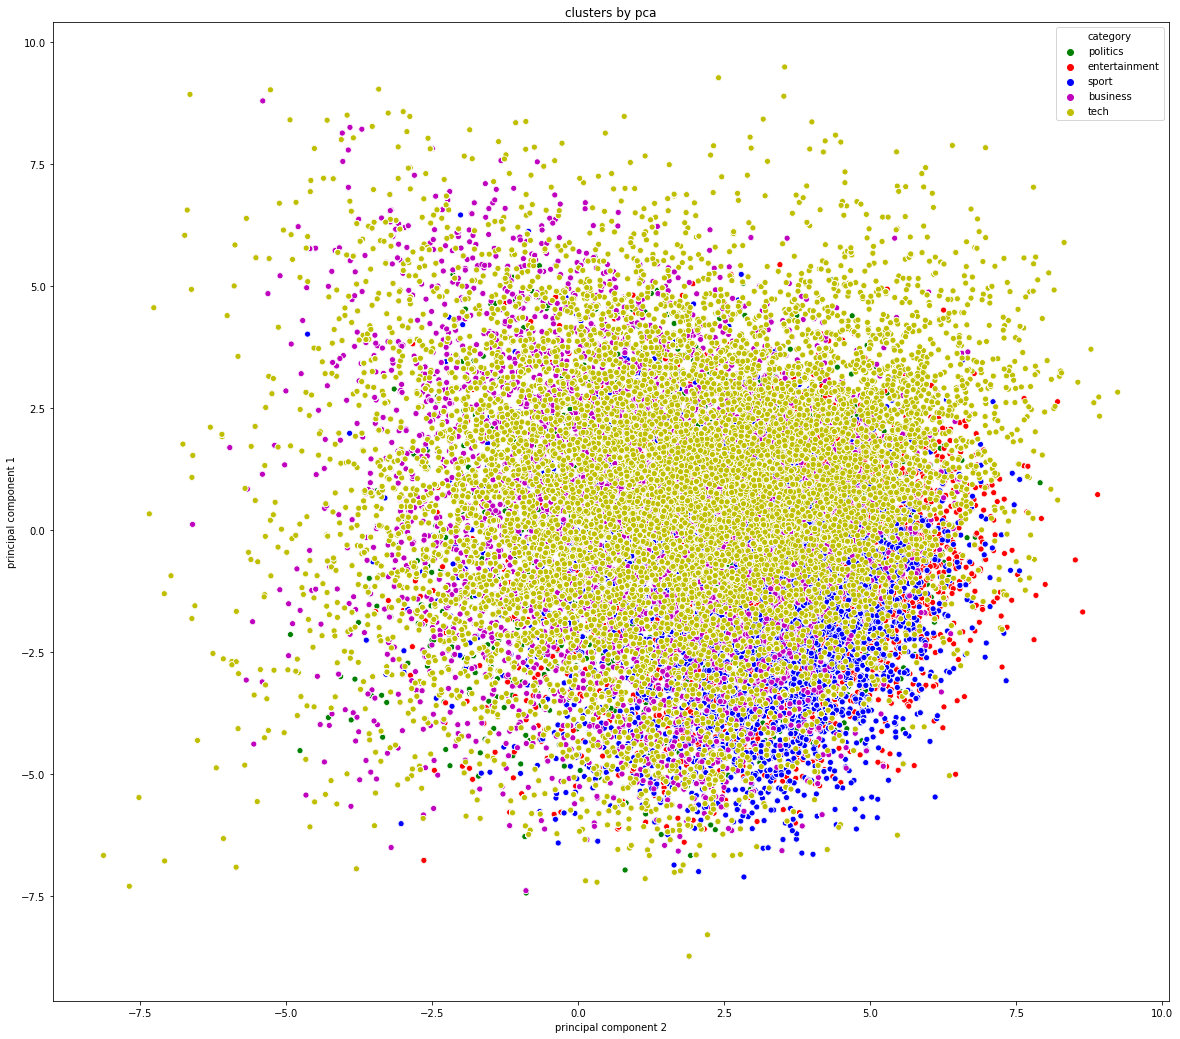

In [135]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['category'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()

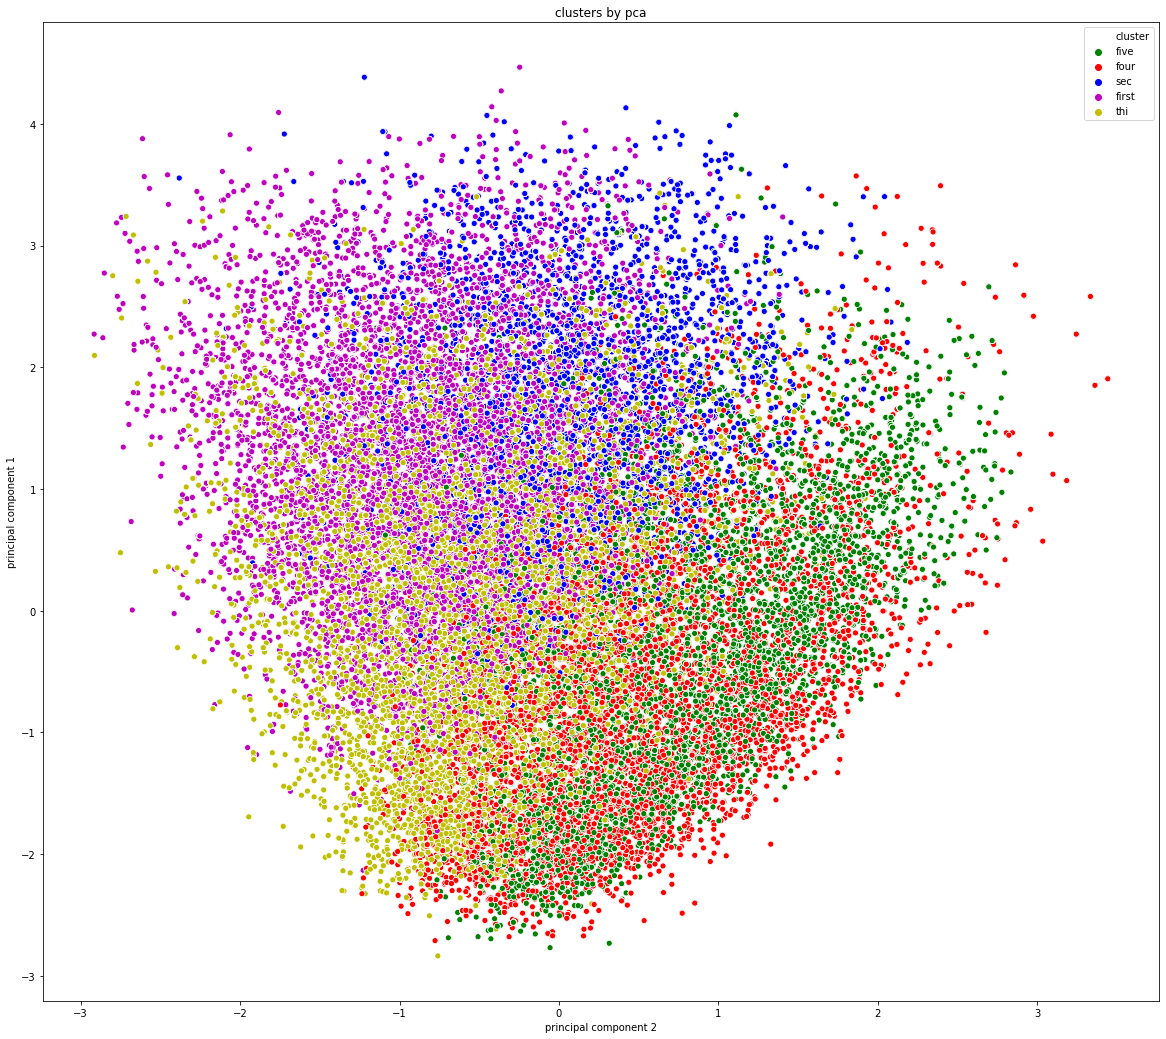

In [136]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=0)
matrix_lsi = svd.fit_transform(vector_list)



principalDf = pd.DataFrame(data = matrix_lsi, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = df['category']

principalDf['targets'] = assigned_clusters

principalDf['cluster'] = principalDf['targets'].map({0:'first',1:'sec',2:'thi',3:'four',4:'five'})

principalDf['category'] = df['category']

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()


In [137]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['category'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()

In [138]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=2, random_state=0)
matrix_ica = transformer.fit_transform(vector_list)

principalDf = pd.DataFrame(data = matrix_ica, columns = ['principal component 1', 'principal component 2'])

principalDf['category'] = df['category']

principalDf['targets'] = assigned_clusters

principalDf['cluster'] = principalDf['targets'].map({0:'first',1:'sec',2:'thi',3:'four',4:'five'})

x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['cluster'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()


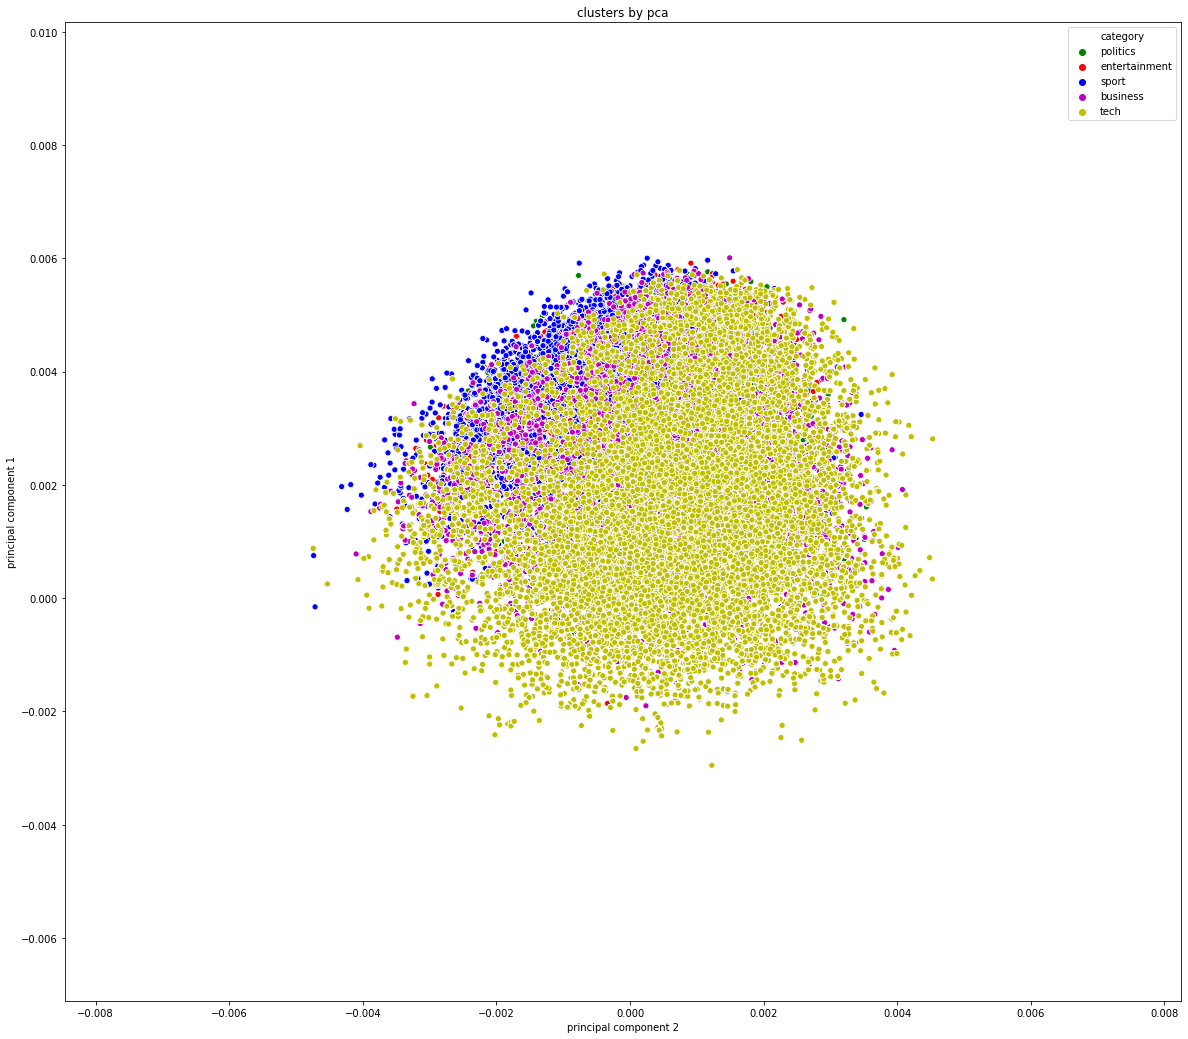

In [139]:
x_axis = principalDf['principal component 2']
y_axis = principalDf['principal component 1']
plt.figure(figsize=(20,18))
sns.scatterplot(x_axis, y_axis,hue=principalDf['category'],palette=['g','r','b','m','y'])
plt.title('clusters by pca')
plt.show()